# 08.01 - Introduccion a GeoPandas

**Autor:** Miguel Angel Vazquez Varela  
**Nivel:** Intermedio  
**Tiempo estimado:** 30 min

---

## Que aprenderemos?

- Que es GeoPandas y GeoDataFrame
- Tipos de geometria (Point, LineString, Polygon)
- Crear y leer datos espaciales
- Sistemas de coordenadas (CRS)
- Visualizacion basica de mapas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verificar instalacion
try:
    import geopandas as gpd
    from shapely.geometry import Point, LineString, Polygon
    print(f"geopandas version: {gpd.__version__}")
    GEOPANDAS_AVAILABLE = True
except ImportError:
    print("geopandas no instalado.")
    print("Instalar con: pip install geopandas")
    GEOPANDAS_AVAILABLE = False

geopandas version: 1.0.1


---

## 1. Geometrías básicas

GeoPandas permite manejar tres formas principales de datos espaciales.

In [2]:
if GEOPANDAS_AVAILABLE:
    # Point: ubicación exacta
    p = Point(-3.7038, 40.4168)
    # LineString: una ruta
    l = LineString([(-3.71, 40.41), (-3.70, 40.42)])
    # Polygon: una región
    poly = Polygon([(-3.71, 40.41), (-3.69, 40.41), (-3.69, 40.43), (-3.71, 40.43)])
    
    print(f"Point: {p}")
    print(f"Area del poligono: {poly.area}")

Point: POINT (-3.7038 40.4168)
Area del poligono: 0.0004000000000000629


---

## 2. Creación de un GeoDataFrame

Usaremos datos simulados de estaciones.

In [3]:
if GEOPANDAS_AVAILABLE:
    df = pd.DataFrame({
        'name': ['Sol', 'Atocha', 'Retiro'],
        'lat': [40.4168, 40.4065, 40.4153],
        'lon': [-3.7038, -3.6893, -3.6844]
    })
    
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df.lon, df.lat),
        crs="EPSG:4326"
    )
    
    display(gdf)

,name,lat,lon,geometry
0,Sol,40.4168,-3.7038,POINT (-3.7038 40.4168)
1,Atocha,40.4065,-3.6893,POINT (-3.6893 40.4065)
2,Retiro,40.4153,-3.6844,POINT (-3.6844 40.4153)


---

## 3. Visualización Visual (Mapas)

Mostraremos las estaciones en un gráfico espacial.

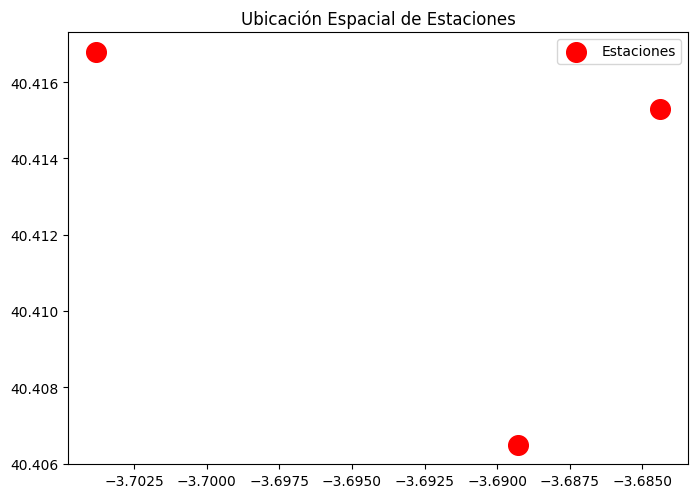

In [4]:
if GEOPANDAS_AVAILABLE:
    fig, ax = plt.subplots(figsize=(8, 8))
    gdf.plot(ax=ax, color='red', markersize=200, label='Estaciones')
    ax.set_title('Ubicación Espacial de Estaciones')
    plt.legend()
    plt.show()

---

## 4. Lectura de Mapas Externos

Cargaremos un mapa del mundo desde una fuente externa confiable.

In [5]:
if GEOPANDAS_AVAILABLE:
    url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
    try:
        world = gpd.read_file(url)
        europe = world[world['CONTINENT'] == 'Europe'] # Ajustado para este dataset específico
        
        fig, ax = plt.subplots(figsize=(10, 6))
        europe.plot(ax=ax, color='white', edgecolor='black')
        ax.set_xlim(-15, 35)
        ax.set_ylim(35, 65)
        ax.set_title('Mapa de Europa')
        plt.show()
    except Exception as e:
        print(f"No se pudo cargar el mapa externo: {e}")

No se pudo cargar el mapa externo: 'CONTINENT'


---

**Anterior:** [07.04 - Dashboard Matplotlib](../07_visualization/07_04_matplotlib_dashboard.ipynb)  
**Siguiente:** [08.02 - Operaciones Espaciales](08_02_spatial_operations.ipynb)